## 상점별 매출예측
핀테크 기업인 ‘FUNDA(펀다)’는 상환 기간의 매출을 예측하여 신용 점수가 낮거나 담보를 가지지 못하는 우수 상점들에 금융 기회를 제공하려 합니다.  
이번 대회에서는  2년 전 부터 2019년 2월 28일까지의 카드 거래 데이터를 이용해 **2019-03-01부터 2019-05-31까지의 각 상점별 3개월 총 매출을 예측**하는 것입니다.

In [1]:
import pandas as pd

In [2]:
funda = pd.read_csv("funda_train.csv", parse_dates=['transacted_date'])

In [3]:
funda.head(10)

,store_id,card_id,card_company,transacted_date,transacted_time,installment_term,region,type_of_business,amount
0,0,0,b,2016-06-01,13:13,0,NaN,기타 미용업,1857.142857
1,0,1,h,2016-06-01,18:12,0,NaN,기타 미용업,857.142857
2,0,2,c,2016-06-01,18:52,0,NaN,기타 미용업,2000.000000
3,0,3,a,2016-06-01,20:22,0,NaN,기타 미용업,7857.142857
4,0,4,c,2016-06-02,11:06,0,NaN,기타 미용업,2000.000000
5,0,5,c,2016-06-02,13:09,0,NaN,기타 미용업,2000.000000
6,0,6,f,2016-06-02,15:33,0,NaN,기타 미용업,2000.000000
7,0,7,a,2016-06-02,17:18,0,NaN,기타 미용업,7857.142857
8,0,8,c,2016-06-02,18:30,0,NaN,기타 미용업,2000.000000
9,0,9,a,2016-06-02,19:56,0,NaN,기타 미용업,1857.142857


In [4]:
funda['type_of_business'].unique()

array(['기타 미용업', nan, '의복 액세서리 및 모조 장신구 도매업', '한식 음식점업',
       '배관 및 냉ㆍ난방장치 도매업', '그 외 기타 스포츠시설 운영업', '간이음식 포장 판매 전문점',
       '안경 및 렌즈 소매업', '그 외 기타 분류 안된 상품 전문 소매업', '채소, 과실 및 뿌리작물 소매업',
       '서양식 음식점업', '통신기기 소매업', '기타 주점업', '의복 소매업', '두발 미용업',
       '섬유, 직물 및 의복액세서리 소매업', '외국어학원', '기타 외국식 음식점업', '가정용 세탁업',
       '낚시장 운영업', '육류 소매업', '전자상거래 소매업', '일식 음식점업', '화장품, 비누 및 방향제 소매업',
       '가전제품 소매업', '기타 스포츠 교육기관', '체형 등 기타 신체관리 서비스업', '여행사업',
       '기타 교육지원 서비스업', '기타 교습학원', '곡물 및 기타 식량작물 재배업', '기록매체 복제업',
       '골프연습장 운영업', '속옷 및 잠옷 소매업', '그 외 기타 분류 안된 사업지원 서비스업', '담배 소매업',
       '기타 예술학원', '문구용품 및 회화용품 소매업', '기타 음ㆍ식료품 위주 종합 소매업',
       '운동 및 경기용품 소매업', '그 외 기타 상품 전문 도매업', '그 외 기타 창작 및 예술관련 서비스업',
       '자전거 및 기타 운송장비 소매업', '가구 소매업', '애완용 동물 및 관련용품 소매업',
       '철물, 금속 파스너 및 수공구 도매업', '피부 미용업', '기타 자동차 신품 부품 및 내장품 판매업',
       '비알코올 음료점업', '화장품 및 화장용품 도매업', '애완동물 장묘 및 보호 서비스업',
       '그 외 기타 무점포 소매업', '운동 및 경기용품 도매업', '치킨 전문점', '자동차 전문 수리업',
       '일반 교과 학원', '그 외 기타 생활용품 

In [9]:
time_series = funda.groupby('transacted_date')['amount'].sum()
time_series = time_series.astype(float)
time_series

transacted_date
2016-06-01    6.520140e+07
2016-06-02    5.711538e+07
2016-06-03    5.513237e+07
2016-06-04    5.592585e+07
2016-06-05    3.591438e+07
                  ...     
2019-02-24    4.434473e+07
2019-02-25    8.626284e+07
2019-02-26    9.586899e+07
2019-02-27    9.389932e+07
2019-02-28    1.007163e+08
Name: amount, Length: 1003, dtype: float64

In [10]:
time_series = time_series.reset_index()

In [11]:
import seaborn
import matplotlib.pyplot as plt

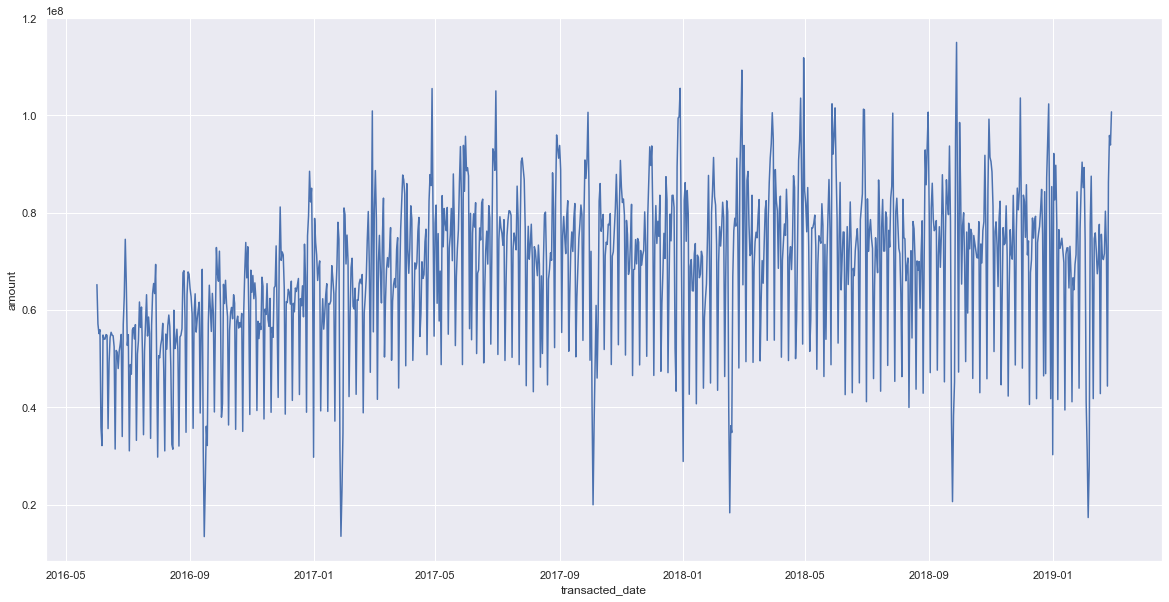

In [12]:
fig=plt.figure(figsize=(20,10))
seaborn.lineplot('transacted_date', 'amount' 
                 ,sizes=(10,1)
                 , data=time_series)

seaborn.set(style='darkgrid')

## 분산안정화- log

In [13]:
# 차분하기전 분산 안정화를 위해 log함수 이용

import numpy

In [14]:
x = time_series['amount'].values
x = numpy.log(x)

In [15]:
x

array([17.99299144, 17.86058404, 17.82524763, ..., 18.37849313,
       18.35773369, 18.42781774])

In [16]:
time_series 

,transacted_date,amount
0,2016-06-01,6.520140e+07
1,2016-06-02,5.711538e+07
2,2016-06-03,5.513237e+07
3,2016-06-04,5.592585e+07
4,2016-06-05,3.591438e+07
...,...,...
998,2019-02-24,4.434473e+07
999,2019-02-25,8.626284e+07
1000,2019-02-26,9.586899e+07
1001,2019-02-27,9.389932e+07


In [17]:
time_series['log_amount']=pd.Series(x)

In [18]:
time_series

,transacted_date,amount,log_amount
0,2016-06-01,6.520140e+07,17.992991
1,2016-06-02,5.711538e+07,17.860584
2,2016-06-03,5.513237e+07,17.825248
3,2016-06-04,5.592585e+07,17.839537
4,2016-06-05,3.591438e+07,17.396648
...,...,...,...
998,2019-02-24,4.434473e+07,17.607504
999,2019-02-25,8.626284e+07,18.272909
1000,2019-02-26,9.586899e+07,18.378493
1001,2019-02-27,9.389932e+07,18.357734


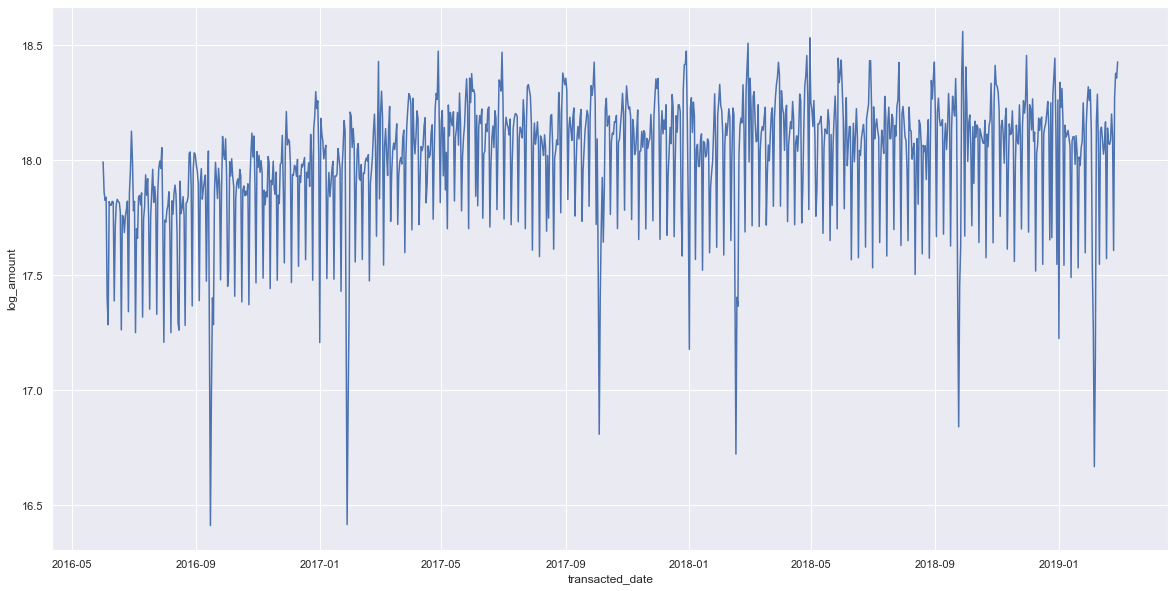

In [19]:
fig=plt.figure(figsize=(20,10))
seaborn.lineplot('transacted_date', 'log_amount' 
                 ,sizes=(10,1)
                 , data=time_series)

seaborn.set(style='darkgrid')

## 추세제거 - 추세가 거희 없는거 같아서 PASS

## ARMA(p,0,q) 찾기 - ACF, PACF

In [29]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

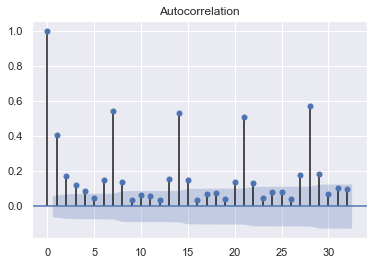

In [31]:
fig = plot_acf(time_series['log_amount'], lags=32) # 32개월 ACF로 MA(q)의 q

1,2,3,4 6,7,8,13,14,15,.... 자기상관이 제거가 안된 lag가 왤케 많아? 

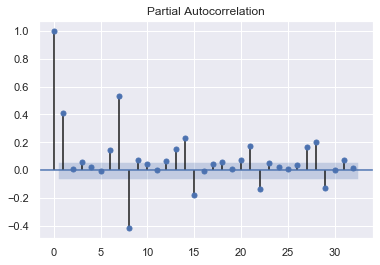

In [33]:
fig = plot_pacf(time_series['log_amount'], lags=32) # 32개월 PACF로 AR(p)의 p

계절성에 의해 생겨서 지수적인 감소가 생기지 않고 일정 부분 반복하는 건가?? 이러한 계절성은 같이 제거해야 하나? 
## 차분을 해보자 

In [40]:
diff_1 = time_series.diff(periods=1).iloc[1:]
diff_1 

,transacted_date,amount,log_amount
1,1 days,-8.086013e+06,-0.132407
2,1 days,-1.983010e+06,-0.035336
3,1 days,7.934743e+05,0.014290
4,1 days,-2.001146e+07,-0.442889
5,1 days,-3.808245e+06,-0.112091
...,...,...,...
998,1 days,-2.840560e+07,-0.495040
999,1 days,4.191811e+07,0.665405
1000,1 days,9.606150e+06,0.105584
1001,1 days,-1.969671e+06,-0.020759


In [41]:
diff_1 = diff_1.drop(['amount' , 'transacted_date'], axis=1)
diff_1

,log_amount
1,-0.132407
2,-0.035336
3,0.014290
4,-0.442889
5,-0.112091
...,...
998,-0.495040
999,0.665405
1000,0.105584
1001,-0.020759


diff_1 = diff_1['log_amount'].diff(periods=1).iloc[1:]

ing : https://byeongkijeong.github.io/ARIMA-with-Python/

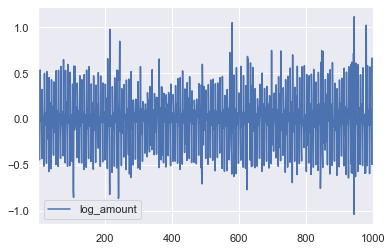

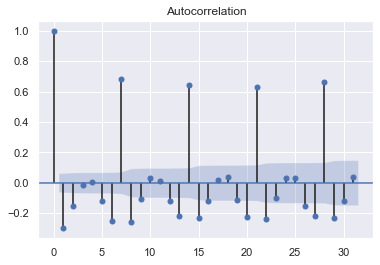

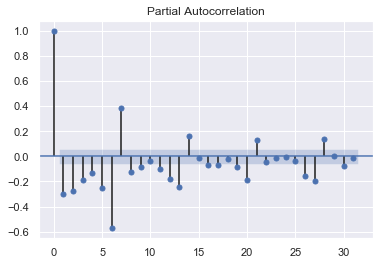

In [42]:
diff_1.plot()
plot_acf(diff_1)
plot_pacf(diff_1)
plt.show()

- AR(p)
- MA(q) 
지수적인 감소가 아니어서 p 랑 q 추정을 못하겠는데? ->> 계절차분의 필요성을 느끼는 작업